# Generate figures for manuscript
These are figures that are not directly produced by the tools in NiMARE.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from nilearn import plotting

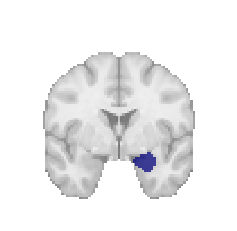

In [16]:
f = "data/amygdala_roi.nii.gz"
fig, ax = plt.subplots(figsize=(6, 6))
plotting.plot_roi(
    f,
    draw_cross=False,
    annotate=False,
    display_mode="y",
    cut_coords=[0],
    axes=ax,
)
fig.set_size_inches((4, 4))
fig.savefig(
    "images/figure_00_roi.svg",
    transparent=True, 
    bbox_inches="tight", 
    pad_inches=0,
)
fig.savefig(
    "images/figure_00_roi_lowres.png",
    transparent=True, 
    bbox_inches="tight", 
    pad_inches=0,
)

/Users/taylor/Documents/tsalo/nilearn/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


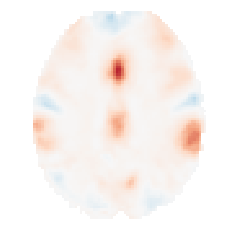

In [61]:
f = "data/pain_map.nii.gz"
fig, ax = plt.subplots(figsize=(6, 6))
plotting.plot_stat_map(
    f,
    bg_img=None,
    draw_cross=False,
    annotate=False,
    cmap="RdBu_r",
    display_mode="z",
    cut_coords=[28],
    axes=ax,
    colorbar=False,
)
fig.set_size_inches((4, 4))
fig.savefig(
    "images/figure_00_map.svg",
    transparent=True, 
    bbox_inches="tight", 
    pad_inches=0,
)
fig.savefig(
    "images/figure_00_map_lowres.png",
    transparent=True, 
    bbox_inches="tight", 
    pad_inches=0,
)

In [42]:
import nimare
from nilearn import input_data
dset = nimare.dataset.Dataset.load("data/neurosynth_dataset_with_abstracts.pkl.gz")
dset.masker = input_data.NiftiMasker(dset.masker.mask_img)
ale = nimare.meta.cbma.ALE(kernel__sample_size=20)
studies = dset.get_studies_by_label("Neurosynth_TFIDF__cognitive control", label_threshold=0.001)
studies = studies[:100]
cc_dset = dset.slice(studies)
res = ale.fit(cc_dset)

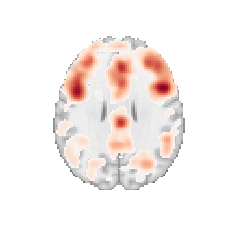

In [56]:
fig, ax = plt.subplots(figsize=(6, 6))
plotting.plot_stat_map(
    res.get_map("z"),
    draw_cross=False,
    annotate=False,
    cmap="RdBu_r",
    display_mode="z",
    cut_coords=[28],
    axes=ax,
    colorbar=False,
    threshold=.01,
)
fig.set_size_inches((4, 4))
fig.savefig(
    "images/figure_00_cbma_unc.svg",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)
fig.savefig(
    "images/figure_00_cbma_unc_lowres.png",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)

In [43]:
corr = nimare.correct.FWECorrector(method="montecarlo", n_iters=100, n_cores=4)
cres = corr.transform(res)

INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


  0%|          | 0/100 [00:00<?, ?it/s]

INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.


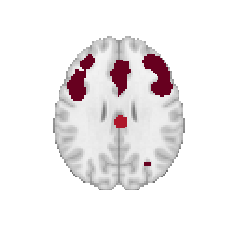

In [57]:
fig, ax = plt.subplots(figsize=(6, 6))
plotting.plot_stat_map(
    cres.get_map("z_level-cluster_corr-FWE_method-montecarlo"),
    draw_cross=False,
    annotate=False,
    cmap="RdBu_r",
    display_mode="z",
    cut_coords=[28],
    axes=ax,
    colorbar=False,
    threshold=0.01,
)
fig.set_size_inches((4, 4))
fig.savefig(
    "images/figure_00_cbma_fwe.svg",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)
fig.savefig(
    "images/figure_00_cbma_fwe_lowres.png",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)

In [59]:
macm = nimare.meta.cbma.ALE(kernel__sample_size=20)
studies = dset.get_studies_by_mask("data/amygdala_roi.nii.gz")
amyg_dset = dset.slice(studies)
res = ale.fit(amyg_dset)

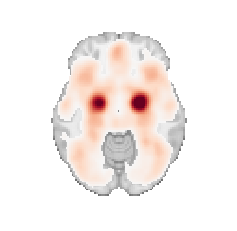

In [64]:
fig, ax = plt.subplots(figsize=(6, 6))
plotting.plot_stat_map(
    res.get_map("z"),
    draw_cross=False,
    annotate=False,
    cmap="RdBu_r",
    display_mode="z",
    cut_coords=[-12],
    axes=ax,
    colorbar=False,
    threshold=.01,
)
fig.set_size_inches((4, 4))
fig.savefig(
    "images/figure_00_macm_unc.svg",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)
fig.savefig(
    "images/figure_00_macm_unc_lowres.png",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)

In [65]:
corr = nimare.correct.FWECorrector(method="montecarlo", n_iters=100, n_cores=4)
cres = corr.transform(res)

INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plotting.plot_stat_map(
    cres.get_map("z_level-cluster_corr-FWE_method-montecarlo"),
    draw_cross=False,
    annotate=False,
    cmap="RdBu_r",
    display_mode="z",
    cut_coords=[28],
    axes=ax,
    colorbar=False,
    threshold=0.01,
)
fig.set_size_inches((4, 4))
fig.savefig(
    "images/figure_00_macm_fwe.svg",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)
fig.savefig(
    "images/figure_00_macm_fwe_lowres.png",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)